## Ejercicio 1

Los arribos de muestras al instituto ocurren de acuerdo a un proceso de Poisson con tasa de arribos de 1 evento cada 4 horas o lo que es lo mismo $\frac{0.25}{\textrm{hora}}$.

Por otro lado, en el caso del proveedor 1 tendremos también un caso de coloreo de eventos de un proceso Poisson, al tener que distribuir las muestras entre 2 unidades de diagnóstico con probabilidades 0.6 y 0.4. Esto nos permite ver a la llegada de muestras a cada una de las unidades de diagnóstico como procesos de Poisson separados, uno con tasa de arribo $\frac{1}{\lambda_1} = 0.6 \times \frac{0.25}{\textrm{hora}}$ y el otro con tasa de arribo $ \frac{1}{\lambda_2} = 0.4 \times \frac{0.25}{\textrm{hora}}$ 


### Proveedor 1

La simulación se llevará a cabo de la siguiente forma:
En primer lugar, se simula el tiempo que demora en llegar una solicitud, desde la llegada de la anterior.
Esto se hace con un generador de muestras de una exponencial con media 4.

Se tiene almacenado el tiempo de espera que vigente para cada una de las unidades de diagnóstico luego de la llegada de la solicitud anterior. A esos valores se les resta el tiempo transcurrido entre esta solicitud y la anterior, o se los setea a cero, en caso de que el tiempo de espera vigente fuese menor.

Luego, se simula la asignación de la muestra a una de las unidades de diagnóstico mediante la generación de uan variable uniforme entre 0 y 1, y su mapeo a la región [0,p) o [p,1]. 

Si el valor de la variable de tiempo de espera de la unidad a la que se asignó la muestra es mayor a cero, se lo suma al tiempo de espera total, y se incrementa un contador que registra la cantidad de muestras que debieron esperar.

Seguido a esto, se simula el tiempo que demora el diagnóstico de la muestra, mediante un generador de exponenciales con media 0.7 o 1 según la unidad de diagnóstico. 

El tiempo de diagnóstico se suma a una variable que guarda la suma del tiempo de diagnóstico de todas las muestras.

Se le suma al tiempo de espera de la unidad correspondiente el tiempo de diagnóstico de la muestra.

El proceso descripto se repite 100.000 veces. 

Una vez finalizado, se computa (con N = 100.000):
El tiempo medio de espera de cada muestra como la espera total sobre la cantidad de muestras (100.000)

$$
\overline{T}_{\textrm{espera}} = \frac{\textrm{espera_total}}{N}
$$

La fracción de solicitudes que no esperaron como la diferencia entre las muestras totales y las que esperaron, sobre la cantidad de muestras totales

$$
\textrm{fracción sin espera} = \frac{N - \textrm{con_espera}}{N}
$$

El tiempo medio que demora en resolverse cada diagnóstico, incluyendo espera y tiempo de diagnóstico.

$$
\overline{T}_{\textrm{muestra}} = \frac{\textrm{espera_total} + \textrm{total_diag}}{N}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import pandas as pd

In [2]:
# Parámetros
N = 100000
media_llegada = 4
media_diag1 = 0.7
media_diag2 = 1
p = 0.6

espera1 = 0
espera2 = 0
espera_total = 0
esperaron = 0
total_diag = 0

t_global = 0
llegada_1 = []
llegada_2 = []
esperaron_1 = []
esperaron_2 = []
for i in range(0,N):
    t = expon.rvs(size=1,scale=media_llegada)[0]
    t_global+= t
    espera1 = 0 if espera1 - t < 0 else espera1 - t
    espera2 = 0 if espera2 - t < 0 else espera2 - t
    if np.random.rand() < p:
        llegada_1.append(t_global)
        if (espera1 > 0):
            esperaron+=1
            esperaron_1.append(t_global)
            espera_total+=espera1
        t_diag = expon.rvs(size=1,scale=media_diag1)[0]
        total_diag += t_diag
        espera1 += t_diag
    
    else:
        llegada_2.append(t_global)
        if (espera2 > 0):
            esperaron+=1
            esperaron_2.append(t_global)
            espera_total+=espera2
        t_diag = expon.rvs(size=1,scale=media_diag2)[0]
        total_diag += t_diag
        espera2 += t_diag

In [3]:
##Tiempo medio de espera por muestra (en horas)
espera_total / N

0.09469428375708744

El tiempo de espera medio por muestra es de 0.093 horas por muestra (unos 5.6 minutos)

In [4]:
# Fracción de muestras que no espera
(N - esperaron) / N

0.89663

Un 89.8% de las muestras fueron diagnosticadas sin esperar

In [5]:
# Tiempo medio de procesamiento de una muestra (en horas)
(total_diag + espera_total) / N

0.9160814107003197

El tiempo medio de procesamiento de las muestras, incluyendo tiempo de diagnóstico y espera fue de 0.92 horas por muestra es decir, unos 55 minutos.

En el siguiente gráfico se observan los arribos de muestras durante las primeras 1000 horas de simulación, y como se distribuyen entre las unidades de diagnóstico.

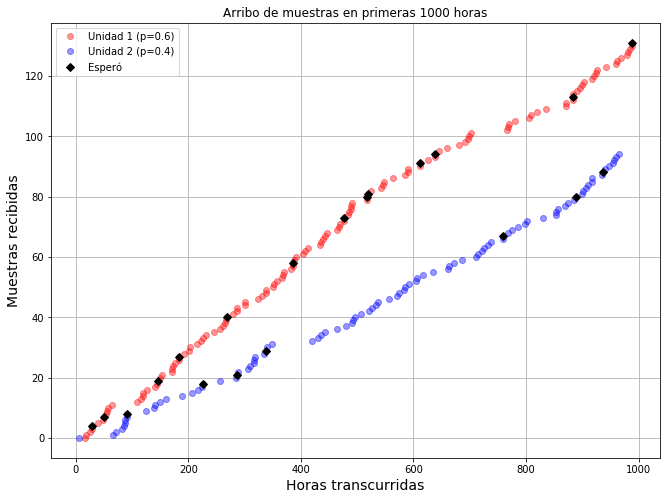

In [6]:
plt.figure(figsize=[24,8])

T = 1000
T_horas_u1 = [t for t in llegada_1 if t < T]
T_horas_u2 = [t for t in llegada_2 if t < T]

T_horas_espera_1 = [t for t in esperaron_1 if t < T]
T_horas_espera_2 = [t for t in esperaron_2 if t < T]

y1 = [T_horas_u1.index(t) for t in T_horas_espera_1]
y2 = [T_horas_u2.index(t) for t in T_horas_espera_2]
T_horas_espera = T_horas_espera_1 + T_horas_espera_2
y = y1+y2
plt.subplot(122)
plt.plot(T_horas_u1,np.arange(0,len(T_horas_u1),1),'ro',\
         alpha=0.4,label="Unidad 1 (p=0.6)")
plt.plot(T_horas_u2,np.arange(0,len(T_horas_u2),1),'bo',\
         alpha=0.4,label="Unidad 2 (p=0.4)")
plt.plot(T_horas_espera,y,'kD',alpha=1,label="Esperó")


plt.ylabel("Muestras recibidas",size=14)
plt.xlabel("Horas transcurridas",size=14)
plt.grid(True)
plt.title("Arribo de muestras en primeras {} horas".format(T))
plt.legend()


En el gráfico podemos ver que hay mas muestras que son asignadas a la unidad 1 como era de esperarse, ya que el arribo de muestras a esa unidad representa un proceso de Poisson con tasa de arribo mayor a la de la unidad 2.

Podemos ver también que solo una pequeña fracción de las muestras requieren de esperar. Esto se debe a que el tiempo de diagnóstico de las unidades es en media mucho menor que el tiempo entre arribos.

Dado a que tanto el tiempo entre arribos y el tiempo de diagnóstico son exponenciales independientes, podemos pensar que lo que determina si una muestra espera o no es el resultado de una "carrera" entre las exponenciales. Al ser la media del tiempo de diagnóstico mucho menor que la de arribos de muestras, casi todas las "carreras" son ganadas por la exponencial que representa el diagnóstico, haciendo que haya muy pocas esperas.

### Proveedor 2

En este caso, el proceso de simulación es análogo al usado para el proveedor 1, pero simplificado por el hecho de que hay una única unidad de diagnóstico y por lo tanto menos variables que simular.

In [7]:
ts = llegada_1 + llegada_2
ts.sort()

media_llegada = 4
media_diag = 0.8

espera_total = 0
esperaron = 0
total_diag = 0
espera = 0

t_ant = 0
arribo_espera = []
for i in range(0,N):
    t = ts[i] - t_ant
    t_ant = ts[i]
    espera = 0 if espera - t < 0 else espera - t
    if (espera > 0):
        arribo_espera.append(ts[i])
        esperaron+=1
        espera_total+=espera
    t_diag = expon.rvs(size=1,scale=media_diag)[0]
    total_diag += t_diag
    espera += t_diag

In [8]:
##Tiempo medio de espera por muestra (en horas)
espera_total / N

0.1971462013310492

El tiempo de espera promedio es de 0.20 horas por muestra (unos 12 minutos).

In [9]:
# Fracción de muestras que no espera
(N - esperaron) / N

0.80315

El 80% de las muestras fueron diagnosticadas sin espera.

In [10]:
# Tiempo medio de procesamiento de una muestra (en horas)
(total_diag + espera_total) / N

0.994529916656818

El tiempo de procesamiento medio fue de 0.996 horas por muestra (prácticamente 60 minutos).

En el siguiente gráfico vemos los arribos de muestras de las primeras 1000 horas de simulación, identificando a las muestras que tuvieron que esperar.

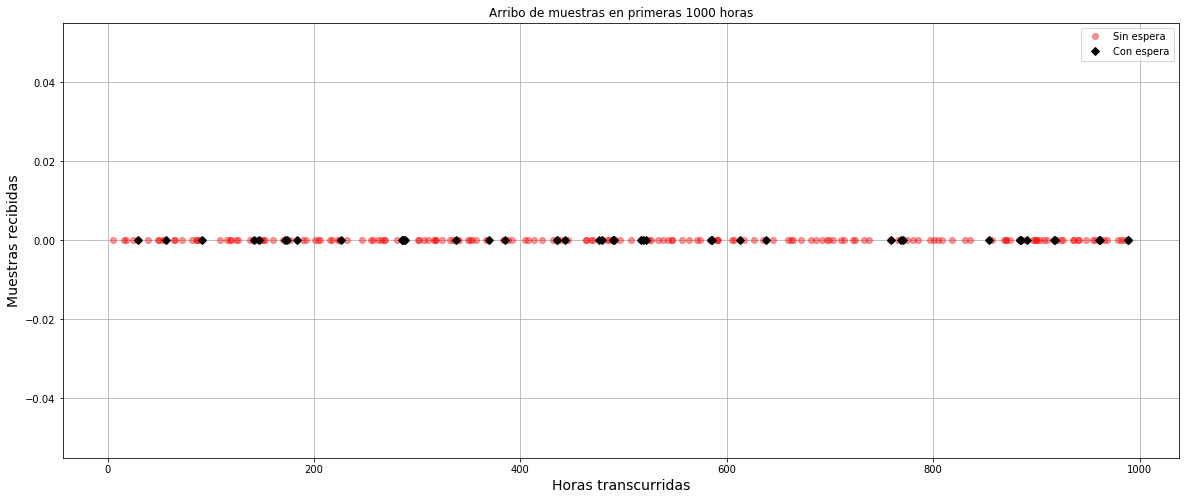

In [11]:
plt.figure(figsize=[20,8])

T = 1000

T_horas = [t for t in ts if t < T]

T_horas_espera = [t for t in arribo_espera if t < T]

y = [T_horas.index(t) for t in T_horas_espera]
y = y
plt.plot(T_horas,np.zeros(len(T_horas)),'ro',\
         alpha=0.4,label="Sin espera")
plt.plot(T_horas_espera,np.zeros(len(T_horas_espera)),'kD'\
         ,alpha=1,label="Con espera")


plt.ylabel("Muestras recibidas",size=14)
plt.xlabel("Horas transcurridas",size=14)
plt.grid(True)
plt.title("Arribo de muestras en primeras {} horas"\
          .format(T))
plt.legend()

A diferencia del caso anterior, en este caso vemos que al haber una única unidad de diagnóstico, hay momentos en que se acumulan muestras en la cola de espera a ser diagnósticadas. Esto puede verse por ejemplo alrededor del tiempo 700 hs.

Vemos que todos los indicadores que se nos pidió extraer de la simulador favorecen al sistema ofrecido por el proveedor 1.

En primer lugar, en el sistema del proveedor 1, el tiempo medio de espera por muestra es de 0,093 horas o 5,6 minutos. En el sistema del proveedor 2, esta magnitud se duplicó, siendo el tiempo de espera promedio de unas 0,2 horas o 12 minutos.

La fracción de muestras que no esperaron a ser procesadas fue 0,89 en el sistema del proveedor 1 y 0,80 en el proveedor 2. 

Por último, el tiempo medio que requiere cada muestra, incluyendo espera y diagnóstico, fue de 0,92 horas en el sistema del proveedor 1, y de 0,996 horas en el del proveedor 2.

Si bien la opción 1 es claramente procesa las muestras con mayor velocidad, el tiempo medio de procesamiento (espera+diagnóstico) por muestra es solo un 8% menor que el de la opción 2. Esto es insuficiente para decidir por la compra de la opción 1, ya que se nos pide que el tiempo medio por muestra sea al menos 50% menor que el de la opción 2 para justificar su mayor costo.

En conclusión, en base al criterio del enunciado, la opción recomendada es la 2.


# Ejercicio 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import collections

### Item A

Estado n -> n solicitudes en el sistema <br>
\[    39/40     , 1/40                       , 0                          ,              0 , 0 , ..... 0 ] <br>
[ 1/30 * 39/40 , (29/30)*(39/40)+(1/30*1/40), (29/30)*(1/40)             ,              0 , 0 , ..... 0 ] <br>
[ 0            , 1/30 * 39/40               , (29/30)*(39/40)+(1/30*1/40), (29/30)*(1/40) , 0 , ..... 0 ]

La Matriz de transiciones va a ser de N*N siendo N la cantidad de iteraciones deseadas.

In [13]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}) #Seteo a 5 decimales
p = 1/40
q = 1/30

Cant_de_solic = 0

N = 5 #Definimos la cantidad de estamos, con el item B justificamos porque decidimos tomar este N.

def fillMatrix(matrix,N):
    matrix[0][0] = 1 - p
    matrix[0][1] = p
    for x in range(1,N-1):
        matrix[x][x-1] = q*(1-p)
        matrix[x][x] = (1-q)*(1-p)+(p*q)
        matrix[x][x+1] = (1-q)*p
    matrix[N-1][N-2] = q
    matrix[N-1][N-1] = 1-q

T = np.zeros(shape=(N,N)) 
fillMatrix(T,N)
T

array([[0.97500, 0.02500, 0.00000, 0.00000, 0.00000],
       [0.03250, 0.94333, 0.02417, 0.00000, 0.00000],
       [0.00000, 0.03250, 0.94333, 0.02417, 0.00000],
       [0.00000, 0.00000, 0.03250, 0.94333, 0.02417],
       [0.00000, 0.00000, 0.00000, 0.03333, 0.96667]])

### Item B y C

Consideramos como supuesto que si la iteracion arranca en 0, osea no habia ninguna solictud en cola hasta que inicio la operacion, en esa itereacion el sistema no pasara a estar procesando

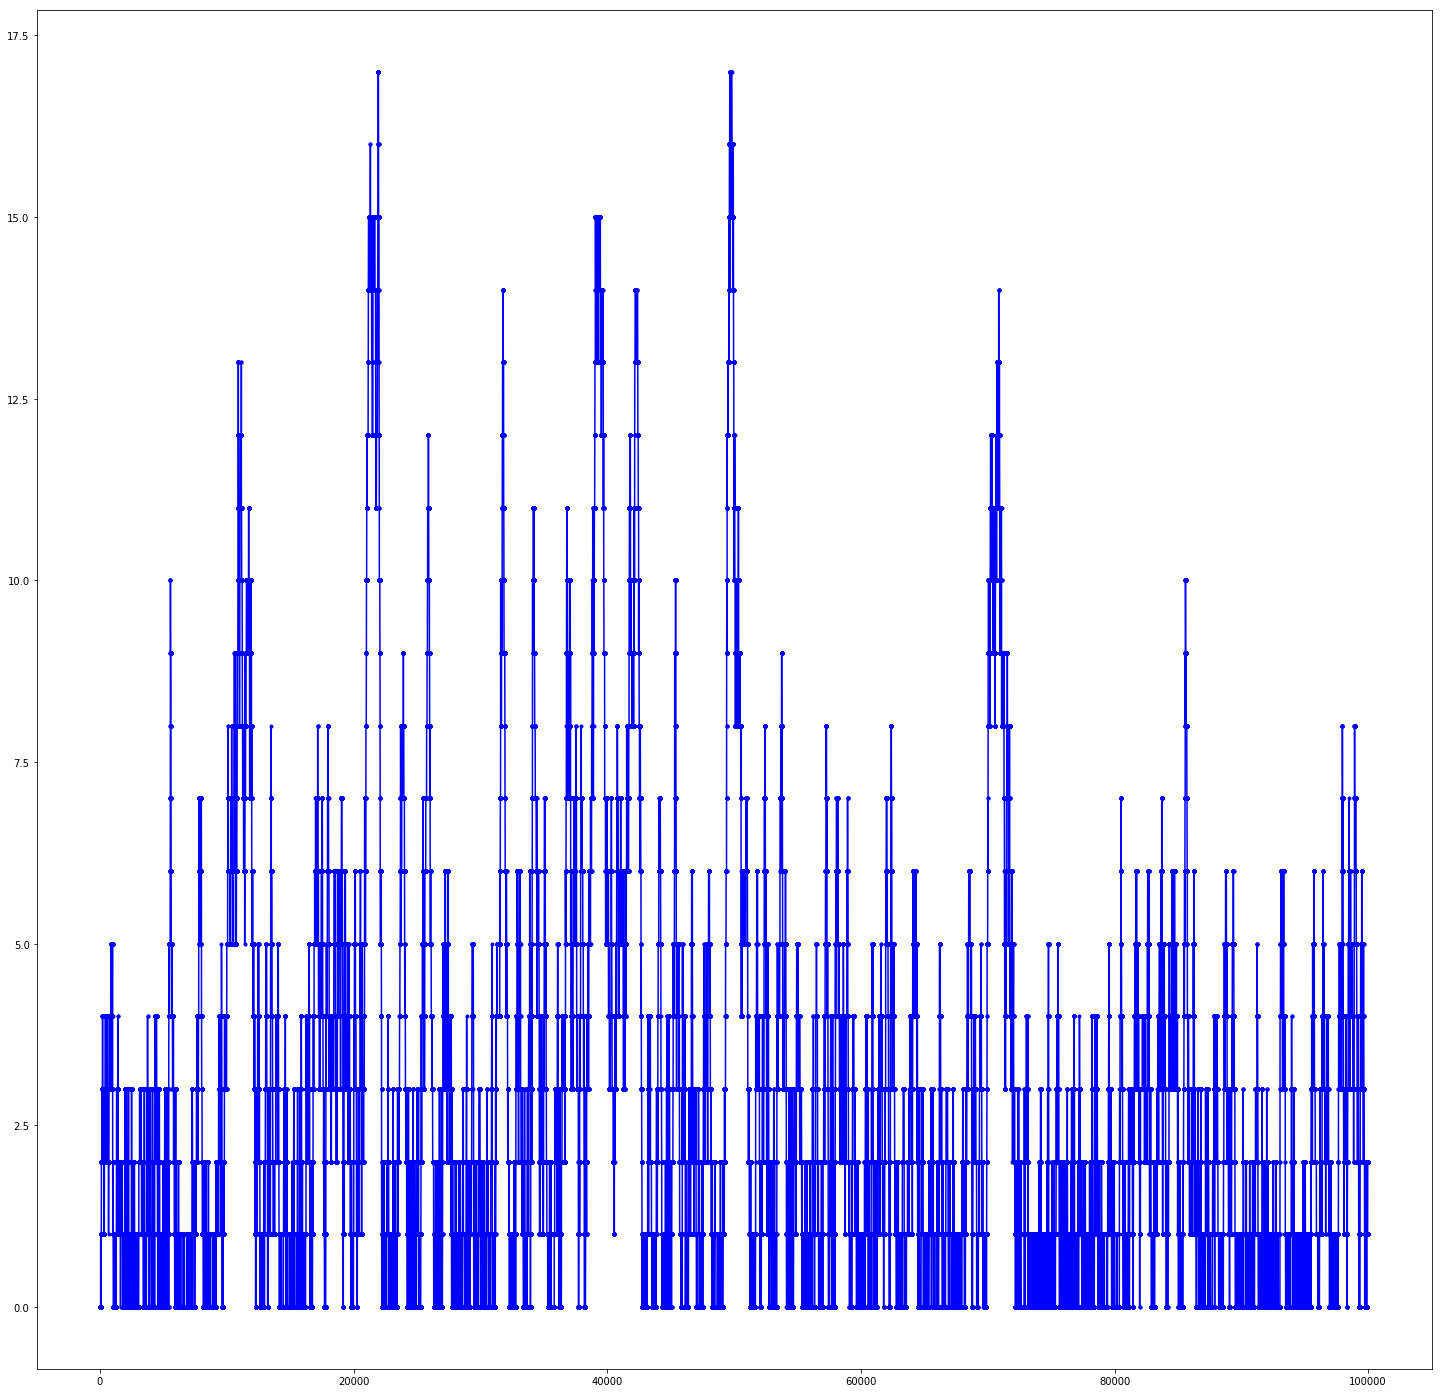

In [14]:
itera = 100000

def getSolicitudes(N) :
    cantidadSolicitudesActual = 0
    cantidadSolicitud = []
    estaProcesando = False
    
    for x in range(N):
        probLlegada = np.random.uniform(low=0, high=1, size=1)[0]
        probSalida = np.random.uniform(low=0, high=1, size=1)[0]
        # Tomamos como que si la iteracion de 10milisegundos arrranca con 0 solicitudes, 
        # en la misma no se procesa nada.
        cantidadSolicitud.append(cantidadSolicitudesActual)
        if ((estaProcesando) and (probSalida <= 1/30)):
            estaProcesando = False
            cantidadSolicitudesActual -= 1
        if (cantidadSolicitudesActual >= 1):
            estaProcesando = True
        if (probLlegada <= 1/40):
            cantidadSolicitudesActual += 1
    return cantidadSolicitud

solicitudes = getSolicitudes(itera)
fig= plt.figure(figsize=(25,25))
plt.plot(solicitudes, linestyle='-' ,marker='.', color='b') 
plt.show()

Probamos la acotacion que hicimos en la matriz de transicion corriendo el experimento 50 veces

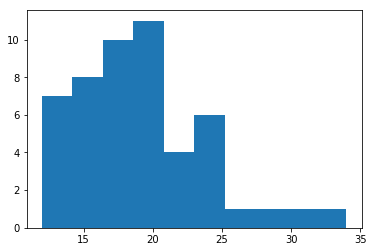

In [15]:
cantidades = []
for x in range(50):
    solicitudes = getSolicitudes(itera)
    cantidades.append(max(solicitudes))

plt.hist(cantidades)
plt.show()

Vemos que el servidor no llega a tener mas de 50 solicitudes al mismo tiempo por lo que decidimos acotar la cantidad de estados

### Item D

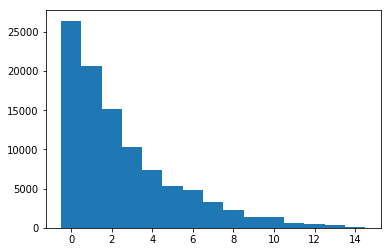

In [16]:
bins = np.arange(-0.5,max(solicitudes)+0.5,1)
plt.hist(solicitudes, bins=bins)
plt.show()

### Item E

In [17]:
cantidadSinProcesar = collections.Counter(solicitudes).get(0)
print("Porcentaje de iteraciones que no esta procesando %" + str((cantidadSinProcesar/itera) * 100))

Porcentaje de iteraciones que no esta procesando %26.41


# Ejercicio 3

## Determinación de los estados

Consideramos que el sistema es el conjunto de ambas acciones. Dicho esto, los estados son los siguientes:
<br>
Estado 0 = Suben ambas acciones <br>
Estado 1 = Baja la accion A sube la accion B<br>
Estado 2 = Sube la accion A Baja la accion B<br>
Estado 3 = Baja ambas acciones<br>
<br>
Un ejemplo de transición entre estados sería: si el día 1 la acción A vale 10 y la accion B vale 15 y el día 2 la accion A vale 12 y la accion B vale 12 y el día 3 la accion A vale 15 y la accion B vale 13, al pasar del día 2 al día 3 estaríamos transicionando entre el estado 2 (Sube A Baja B) al 0 (Suben Ambos).


# Matriz de transiciones

In [18]:
accionesA = pd.read_csv('accion A.csv')
accionesA.rename(columns={'Valor':'ValorA'}, inplace=True)
accionesA.head(5)

,Dia,ValorA
0,1,29.20
1,2,36.05
2,3,31.15
3,4,32.25
4,5,36.30


In [19]:
accionesB = pd.read_csv('accion B.csv')
accionesB.rename(columns={'Valor':'ValorB'}, inplace=True)
accionesB.head(5)

,Dia,ValorB
0,1,20.02
1,2,21.88
2,3,19.85
3,4,18.89
4,5,20.82


In [20]:
accionesA['DeltaA'] = accionesA.ValorA.shift(1)
accionesB['DeltaB'] = accionesB.ValorB.shift(1)
accionesA['DeltaA'] = accionesA.apply(lambda row : row['ValorA'] - row['DeltaA'], axis = 1)
accionesB['DeltaB'] = accionesB.apply(lambda row : row['ValorB'] - row['DeltaB'], axis = 1)

accionesA['PorcentajeA'] = accionesA.apply(lambda row : (row['DeltaA'] / row['ValorA']) * 100, axis = 1)
accionesB['PorcentajeB'] = accionesB.apply(lambda row : (row['DeltaB'] / row['ValorB']) * 100, axis = 1)

acciones = accionesA.merge(accionesB, how='inner',on='Dia')

def getEstado(deltaA, deltaB):
  if (deltaA >= 0 and deltaB >= 0):
    return 1
  if (deltaA < 0 and deltaB >= 0):
    return 2
  if (deltaA >= 0 and deltaB < 0):
    return 3
  if (deltaA < 0 and deltaB < 0):
    return 4

acciones["EstadoActual"] = acciones.apply(lambda row: getEstado(row['DeltaA'],row['DeltaB']), axis = 1)
acciones["EstadoAnterior"] = acciones.EstadoActual.shift(1)
acciones.head()

,Dia,ValorA,DeltaA,PorcentajeA,ValorB,DeltaB,PorcentajeB,EstadoActual,EstadoAnterior
0,1,29.20,NaN,NaN,20.02,NaN,NaN,NaN,NaN
1,2,36.05,6.85,19.001387,21.88,1.86,8.500914,1.0,NaN
2,3,31.15,-4.90,-15.730337,19.85,-2.03,-10.226700,4.0,1.0
3,4,32.25,1.10,3.410853,18.89,-0.96,-5.082054,3.0,4.0
4,5,36.30,4.05,11.157025,20.82,1.93,9.269933,1.0,3.0


In [21]:
def getMatrixTransitions(df):
  trans = np.zeros(shape=(4,4))
  transProb = np.zeros(shape=(4,4))
  for index,row in df.iterrows():
    if index > 2:
      trans[int(row[7]) - 1][int(row[8]) - 1] += 1
  for i in range(4):
    for j in range(4):
      transProb[i][j] = trans[i][j] / sum(list(trans[i]))
  return transProb

transitionMatrix = getMatrixTransitions(acciones)
transitionMatrix

array([[0.10837, 0.22660, 0.31034, 0.35468],
       [0.16744, 0.14419, 0.45581, 0.23256],
       [0.29832, 0.31933, 0.16387, 0.21849],
       [0.36816, 0.30846, 0.18408, 0.13930]])

In [22]:
[autovalores,autovectores] = np.linalg.eig(transitionMatrix)
autovalores

array([1.00000, -0.31407, 0.00160, -0.13180])

Como todos los autovalores menos el primero tienen modulo menor 1, podemos decir que el sistema converge a un estado estable.
Es por eso que el estado estable se puede calcular elevando la matriz de transiciones por N  con N tendiendo a infinito.

In [23]:
np.linalg.matrix_power(transitionMatrix,100)

array([[0.23694, 0.25086, 0.27657, 0.23563],
       [0.23694, 0.25086, 0.27657, 0.23563],
       [0.23694, 0.25086, 0.27657, 0.23563],
       [0.23694, 0.25086, 0.27657, 0.23563]])

Aca podemos ver que cada columna converge a un mismo numero, la fraccion de tiempo el cual el sistema estara en dicho estado

# Porcentajes de variabilidad de la accion A

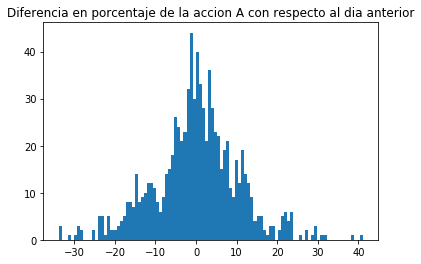

In [24]:
difAccionA = list(accionesA["DeltaA"])
difAccionA.pop(0)
plt.title("Diferencia en porcentaje de la accion A con respecto al dia anterior")
plt.hist(difAccionA,bins=100)
plt.show()

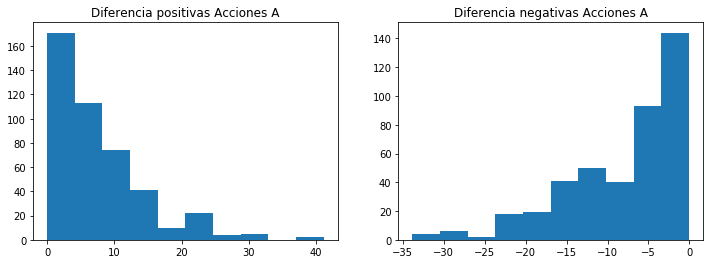

In [25]:
plt.figure(figsize=[12,4])

difAccionAPositivo = list(filter(lambda x : x >= 0,difAccionA));
plt.subplot(121)
plt.title("Diferencia positivas Acciones A")
plt.hist(difAccionAPositivo,bins='sturges')

plt.subplot(122)
difAccionAnegativa = list(filter(lambda x : x < 0,difAccionA));
plt.title("Diferencia negativas Acciones A")
plt.hist(difAccionAnegativa,bins='sturges');

In [26]:
mediaSubaAccionA = np.mean(difAccionAPositivo)
mediaSubaAccionA

7.6128959276018096

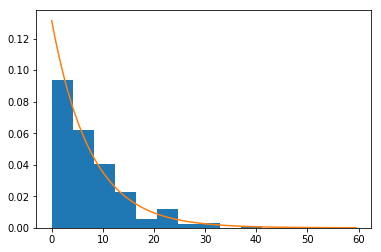

In [27]:
t = np.arange(0,60,0.5)

plt.hist(difAccionAPositivo,bins='sturges',density=True) 
plt.plot(t,expon.pdf(t,scale=mediaSubaAccionA))

In [28]:
mediaBajaAccionA = np.mean(difAccionAnegativa)
mediaBajaAccionA

-8.016546762589927

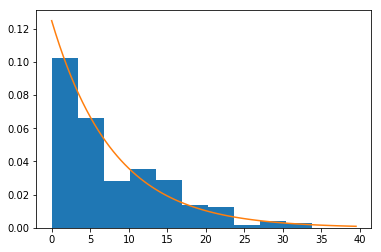

In [29]:
t = np.arange(0,40,0.5)
difAccionAnegativa = [abs(x) for x in difAccionAnegativa]
plt.hist(difAccionAnegativa,bins='sturges',density=True) 
plt.plot(t,expon.pdf(t,scale=-mediaBajaAccionA))

# Porcentajes de variabilidad de la accion B

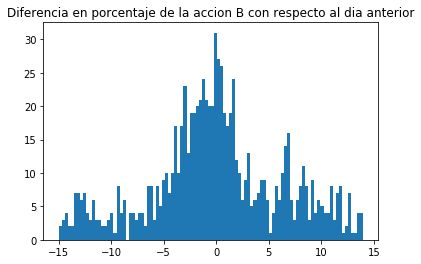

In [30]:
difAccionB = list(accionesB["DeltaB"])
difAccionB.pop(0)
plt.title("Diferencia en porcentaje de la accion B con respecto al dia anterior")
plt.hist(difAccionB,bins=100)
plt.show()

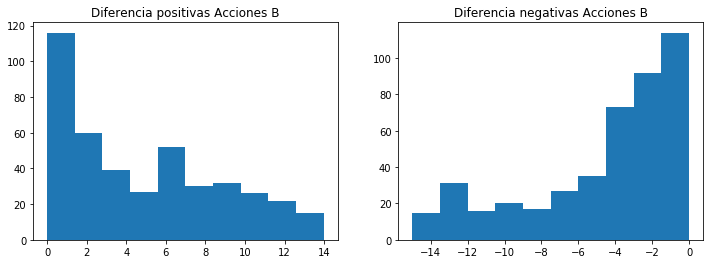

In [31]:
plt.figure(figsize=[12,4])

difAccionBPositivo = list(filter(lambda x : x >= 0,difAccionB));
plt.subplot(121)
plt.title("Diferencia positivas Acciones B")
plt.hist(difAccionBPositivo,bins='sturges')

plt.subplot(122)
difAccionBnegativa = list(filter(lambda x : x < 0,difAccionB));
plt.title("Diferencia negativas Acciones B")
plt.hist(difAccionBnegativa,bins='sturges');

In [32]:
mediaSubaAccionB = np.mean(difAccionBPositivo)
mediaSubaAccionB

4.844105011933174

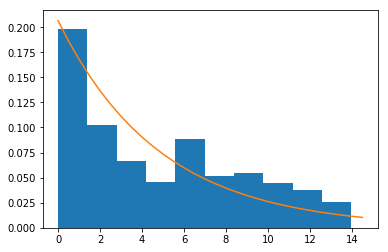

In [33]:
t = np.arange(0,15,0.5)

plt.hist(difAccionBPositivo,bins='sturges',density=True) 
plt.plot(t,expon.pdf(t,scale=mediaSubaAccionB))

In [34]:
mediaBajaAccionB = np.mean(difAccionBnegativa)
mediaBajaAccionB

-4.639045454545454

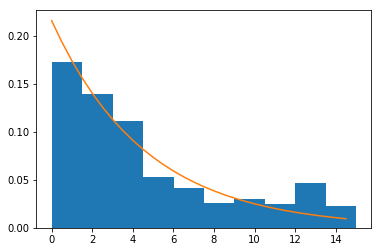

In [35]:
t = np.arange(0,15,0.5)
difAccionBnegativa = [abs(x) for x in difAccionBnegativa]

plt.hist(difAccionBnegativa,bins='sturges',density=True) 
plt.plot(t,expon.pdf(t,scale=-mediaBajaAccionB))

# Simulacion de las acciones en 1 ano

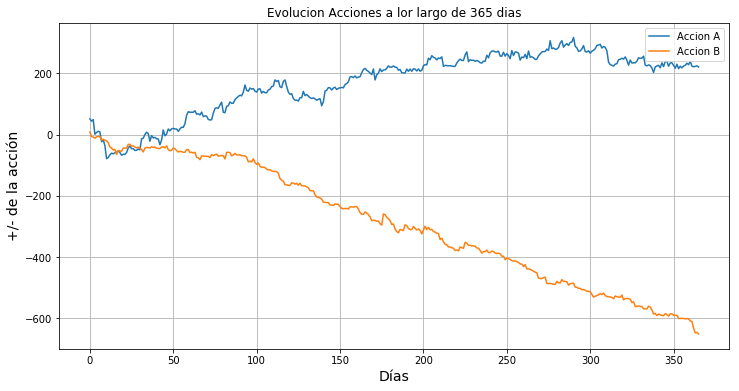

In [36]:
def getProxEstado(estadoAnterior,prob,matriz):
  probabilidadesDeTrnasicion=list(matriz[estadoAnterior])
  if prob <= probabilidadesDeTrnasicion[0]:
    return 0
  if prob <= sum(probabilidadesDeTrnasicion[0:1]):
    return 1
  if prob <= sum(probabilidadesDeTrnasicion[0:2]):
    return 2
  else:
    return 3


def getValorAccionA(valorAnterior,estadoProximo):
  if estadoProximo == 0 or estadoProximo == 2:
    delta = np.random.exponential(mediaSubaAccionA,1)[0]
  else:
    delta = -np.random.exponential(-mediaBajaAccionA, 1)[0]
  return valorAnterior+delta

def getValorAccionB(valorAnterior,estadoProximo):
  if estadoProximo == 0 or estadoProximo == 1:
    delta = np.random.exponential(mediaSubaAccionB,1)[0]
  else:
    delta = -np.random.exponential(-mediaBajaAccionB, 1)[0]
  return valorAnterior+delta


def simularCantDias(N,matriz):
  estadoActual = [0]
  valorAccionA = [list(accionesA['ValorA'])[-1]]
  valorAccionB = [list(accionesB['ValorB'])[-1]]
  for x in range(N):
    uniformeCambioEstado = np.random.uniform(0,1,1)[0]
    estadoProximo = getProxEstado(estadoActual[x],uniformeCambioEstado,matriz)
    valorAccionA.append(getValorAccionA(valorAccionA[-1],estadoProximo))
    valorAccionB.append(getValorAccionB(valorAccionB[-1],estadoProximo))
    estadoActual.append(estadoProximo)
  plt.figure(figsize=[12, 6])
  plt.title("Evolucion Acciones a lor largo de " + str(N) + " dias")
  plt.plot(np.arange(0,366,1),valorAccionA, label="Accion A")
  plt.plot(np.arange(0,366,1),valorAccionB, label="Accion B")
  plt.grid(True)
  plt.ylabel("+/- de la acción", fontsize=14)
  plt.xlabel("Días", fontsize=14)  # show a legend on the plot
  plt.legend()
  plt.show()

simularCantDias(365,transitionMatrix)

Recomendamos invertir en la accion A.
La razon de lo recomendado con anterioridad, es que comparando las medias de las distribuciones que manejan las subas y las bajas de las acciones.
Las distribucion de la suba de la Accion A tiene una media mayor que la distribucion de la suba de la accion B, sumando a esto la probabilidad de suba de la accion A es mayor que la de B.
Igualmente se deberia realizar una mayor cantidad de simulaciones, viendo los distintos graficos de los escenarios obtenidos.

# Ejercicio 4

Definimos al Modelo SIR como:
$$\frac{dS}{dt} = -\beta*S*I$$
$$\frac{dI}{dt} = \beta*S*I - \gamma * I$$
$$\frac{dR}{dt} = \gamma*I $$
Donde $\beta$ es ka tasa de contagio y $\gamma$ es la tasa de recuperacion

### Simulacion con RK(4)

In [37]:
1/23

0.043478260869565216

In [38]:
beta =0.27
gama = .043

S=lambda s_tn0,i_tn0,r_tn0,t:-beta*s_tn0*i_tn0
I=lambda s_tn0,i_tn0,r_tn0,t:beta*s_tn0*i_tn0 - gama * i_tn0
R=lambda s_tn0,i_tn0,r_tn0,t: gama * i_tn0

In [39]:
#R-K4
def step_fn(s_tn0,i_tn0,r_tn0,t,h):
    params = s_tn0,i_tn0,r_tn0,t
    k1,l1,j1 = h*S(*params),h*I(*params),h*R(*params)

    params = s_tn0+k1/2,i_tn0+l1/2,r_tn0+j1/2,t+h/2
    k2,l2,j2 = h*S(*params),h*I(*params),h*R(*params)

    params = s_tn0+k2/2,i_tn0+l2/2,r_tn0+j2/2,t+h/2
    k3,l3,j3 = h*S(*params),h*I(*params),h*R(*params)

    params = s_tn0+k3,i_tn0+l3,r_tn0+j3,t+h
    k4,l4,j4 = h*S(*params),h*I(*params),h*R(*params)

    s_tn1 = s_tn0 + 1/6*(k1+2*k2+2*k3+k4)
    i_tn1 = i_tn0 + 1/6*(l1+2*l2+2*l3+l4)
    r_tn1 = r_tn0 + 1/6*(j1+2*j2+2*j3+j4)

    return s_tn1,i_tn1,r_tn1

In [40]:
def simulate(prc,h,tf,horizontal=None,ignorepop=False):    
    s_tn0,i_tn0,r_tn0 = 1*(1-prc),prc,0
    dc = {}
    if not ignorepop:
        dc['s'] =[s_tn0]
    dc['i'] = [i_tn0]
    dc['r'] = [r_tn0]
    dc['t'] = [0]
    if horizontal!=None:        
        dc['zz'] =[horizontal]
    for t in range(1,tf):        
        s_tn0,i_tn0,r_tn0 = step_fn(s_tn0,i_tn0,r_tn0,t,h)     
        if not ignorepop:
            dc['s'].append(s_tn0)
        dc['i'].append(i_tn0)
        dc['r'].append(r_tn0)
        if horizontal!=None:
            dc['zz'].append(horizontal)
        dc['t'].append(t*h)
    ax = pd.DataFrame(dc).plot(x='t',figsize=(7,7))
    leyendas=['Infectados','Curados']
    
    if horizontal!=None:
        leyendas = leyendas+['Limite']
    if not ignorepop:
        leyendas = ['Sanos']+leyendas
    ax.legend(leyendas)
    ax.set_ylabel('# Personas')
    ax.set_xlabel('Días')
    plt.show()
    None

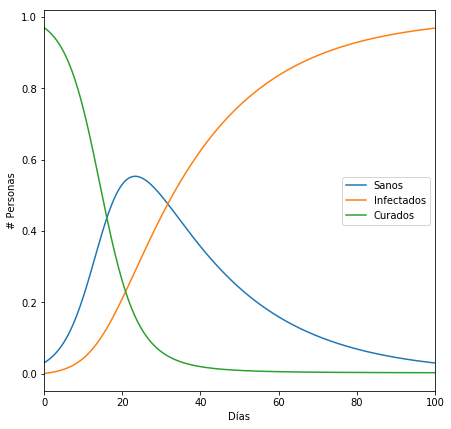

In [41]:
import matplotlib.pyplot as plt
import pandas as pd


simulate(.03,.1,1000)

Ahora sabemos que nuestros hospitales tienen capacidad para 30% de la poblacion. Entonces no queremos que la curva de infectados supere este valor. Para esto modificamos el valor de $\beta$, que lo podemos interpretar como medidas de aislamiento, que disminuyen esta tasa de transmicion.

In [42]:
def get_grande():
    prc=.03
    s_tn0,i_tn0,r_tn0 = 1*(1-prc),prc,0    
    lt = {'x':[],'y':[]}
    for i in range(30000):    
        s_tn0,tmp,r_tn0 = step_fn(s_tn0,i_tn0,r_tn0,0,.01)     
        if tmp<i_tn0:
            return i_tn0        
        i_tn0=tmp
    return -1

In [43]:
alto = 1
bajo = .1
beta = 1
n = get_grande()
#while .2999999999999999>=n or n>=.3000000000000000001:
while n!=.3:
    print(n,beta)
    
    beta = (alto+bajo)/2
    n = get_grande()
    if n>.3:
        alto = beta
    else:
        bajo = beta
beta

0.8230075997285216 1
0.7249361005290426 0.55
0.604113434418794 0.325
0.48050278212493264 0.21250000000000002
0.378103591172875 0.15625
0.3081918244333043 0.128125
0.26672876279383106 0.1140625
0.2880644432747561 0.12109375
0.2982746699036039 0.124609375
0.3032692968487775 0.12636718749999998
0.30078107027419715 0.12548828125
0.2995301495380622 0.125048828125
0.3001561792767491 0.1252685546875
0.29984331027052097 0.12515869140625002
0.2999997787448661 0.125213623046875
0.30007798525840945 0.1252410888671875
0.30003888880636703 0.12522735595703124
0.3000193332060023 0.12522048950195314
0.30000955353681164 0.12521705627441407
0.30000466593337216 0.12521533966064452
0.3000022223780697 0.12521448135375976
0.30000100057120527 0.1252140522003174
0.30000038966047143 0.1252138376235962
0.3000000842032763 0.12521373033523558
0.2999999314742261 0.1252136766910553
0.30000000783878755 0.12521370351314542
0.2999999696565139 0.12521369010210037
0.2999999887476529 0.1252136968076229
0.2999999982932193

0.12521370075986943

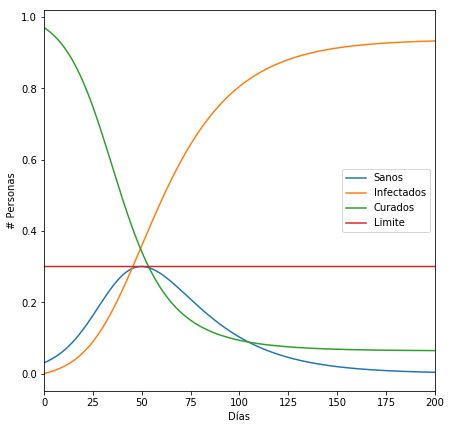

In [44]:
beta = .12521370075986948
simulate(.03,.1,2000,0.3)